# Libraries Imported

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reading .csv file

In [4]:
dataset = pd.read_csv('grid.csv')
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


# Constant Variables

In [5]:
#X = dataset.drop(['stab', 'stabf'], axis=1)
X = dataset.drop(['stab','stabf','p1','p2','p3','p4'], axis = 1)
y = dataset['stabf']

feature_names=['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4']

# Pre-processing (Replacing String Values with Numerical)

In [6]:
dataset['stabf'].replace('unstable', 0, inplace = True)
dataset['stabf'].replace('stable', 1, inplace = True)
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


# Feature Scaling via Standardization

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle =True, test_size=0.25, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Visualizing best value of max_depth (Accuracy Based)

Maximum accuracy:- 0.8947333333333334 at max_depth = 11


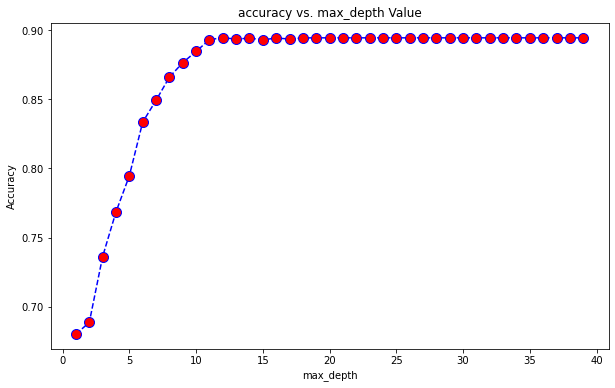

In [11]:
acc=[]
for i in range(1,40):
    clf = DecisionTreeClassifier(random_state = 42, max_depth = i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40), acc, color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. max_depth Value')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at max_depth =", acc.index(max(acc)))

# Decision Tree Classifier

Accuracy: 0.8928666666666667
Precision: 0.8537849342957616
Recall: 0.8495395948434622
F1-score: 0.8516569740607404

Classification Report:

              precision    recall  f1-score       support
0              0.914869  0.917450  0.916158   9570.000000
1              0.853785  0.849540  0.851657   5430.000000
accuracy       0.892867  0.892867  0.892867      0.892867
macro avg      0.884327  0.883495  0.883907  15000.000000
weighted avg   0.892757  0.892867  0.892809  15000.000000


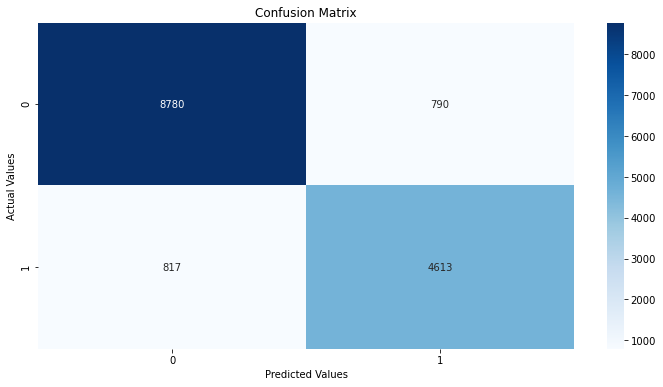

In [19]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", (2*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred)))
print("")

print("Classification Report:\n")
report = classification_report(y_test, y_pred, output_dict = True)
cr = pd.DataFrame(report).transpose()
print(cr)

# Decision Tree (GridSearchCV)

In [73]:
clf = DecisionTreeClassifier(random_state = 42)

param_grid = { 
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth' : [20,21],
    #'criterion' :['gini','entropy'],
    #'splitter' :['best', 'random'],
    #'min_samples_split':[1,2,3], default
    #'min_samples_leaf':[0,1,2], default
    #'min_weight_fraction_leaf':[0, 0.0001], default
    #'min_impurity_decrease':[0,0.5], default
    #'class_weight':['balanced',None], default
    'ccp_alpha':[0, 0.5, 1, 5 , 10], #default
}

CV_dtc = GridSearchCV(estimator = clf, param_grid = param_grid, cv= 5)
CV_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0, 0.5, 1, 5, 10]})

# Decision Tree Best Parameters

In [74]:
CV_dtc.best_params_

{'ccp_alpha': 0}

# Decision Tree Classifier w/ New Parameters

In [13]:
dtc = DecisionTreeClassifier(random_state = 42, criterion = 'entropy', max_depth = 20, max_features = 'log2', splitter = 'best')
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

report = classification_report(y_test, y_pred, output_dict = True)
cr = pd.DataFrame(report).transpose()
print(cr)

              precision    recall  f1-score       support
0              0.911710  0.916092  0.913896   9570.000000
1              0.850854  0.843646  0.847235   5430.000000
accuracy       0.889867  0.889867  0.889867      0.889867
macro avg      0.881282  0.879869  0.880565  15000.000000
weighted avg   0.889680  0.889867  0.889764  15000.000000
